In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Chargement, exploration, nettoyage des données

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv')

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data[data['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,Yes
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,Yes
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,Yes
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,Yes
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,Yes
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,Yes
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,Yes
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,Yes
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
# Remplacer les espaces vides dans TotalCharges par des NaN et convertir en float
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan).astype(float)

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [9]:
data['Churn'].value_counts()

Churn
No     4822
Yes    2210
Name: count, dtype: int64

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
taux_attribution = len(data[data['Churn'] == 'Yes']) / len(data['customerID'])

print(taux_attribution)

0.31427758816837315


In [12]:
data_churn_yes = (data[data['Churn'] == 'Yes'])

In [13]:
data_churn_yes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,2210.000000,2210.000000,2210.000000,2210.000000
mean,0.230317,15.635747,69.831719,1315.625249
std,0.421131,18.792110,26.921056,1811.556008
min,0.000000,1.000000,18.800000,18.850000
25%,0.000000,2.000000,49.462500,85.512500
50%,0.000000,6.000000,75.350000,416.125000
75%,0.000000,24.000000,90.800000,1860.037500
max,1.000000,72.000000,118.350000,8684.800000


In [14]:
data_churn_no = (data[data['Churn'] == 'No'])

In [15]:
data_churn_no.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4822.000000,4822.000000,4822.000000,4822.000000
mean,0.131273,40.115097,62.491269,2726.801514
std,0.337734,22.988490,31.162259,2316.029633
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,19.000000,25.300000,776.512500
50%,0.000000,41.000000,65.800000,1871.500000
75%,0.000000,62.000000,89.450000,4479.112500
max,1.000000,72.000000,118.750000,8672.450000


In [16]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data[data.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


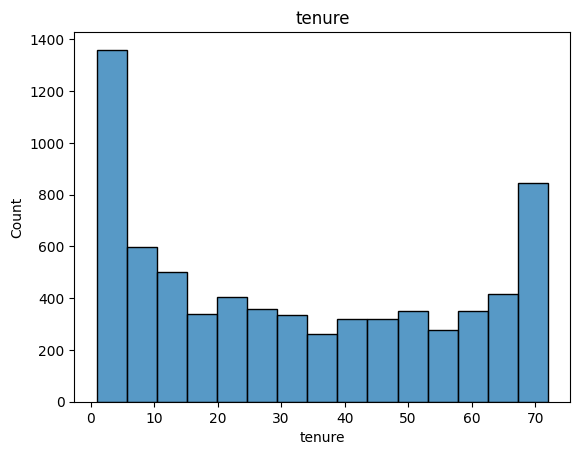

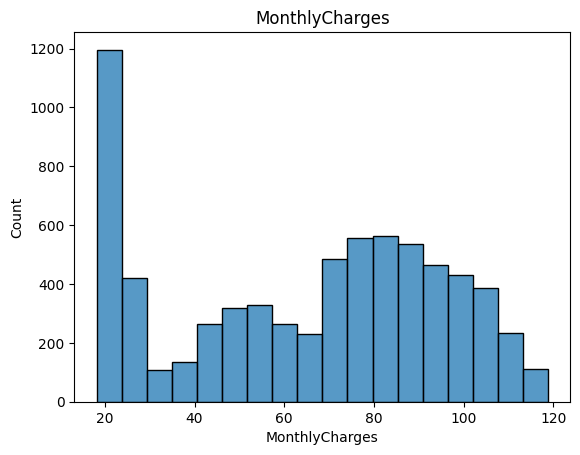

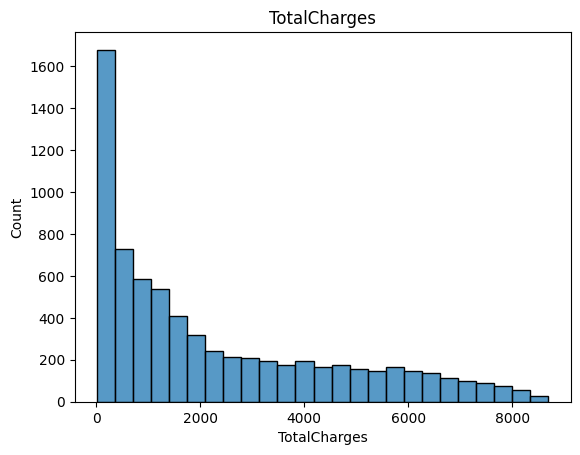

In [19]:
# Afficher les distributions des variables numériques
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_columns:
    sns.histplot(data[col])
    plt.title(col)
    plt.show()

In [20]:
data['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [21]:
data['Churn'].value_counts()

Churn
No     4822
Yes    2210
Name: count, dtype: int64

In [22]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [23]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [24]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: False, 1: True})


In [25]:
data['Dependents'] = data['Dependents'].map({'No': False, 'Yes': True})
data['PhoneService'] = data['PhoneService'].map({'No': False, 'Yes': True})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'No': False, 'Yes': True})
data['Churn'] = data['Churn'].map({'No': False, 'Yes': True})
data['Partner'] = data['Partner'].map({'No': False, 'Yes': True})


In [26]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,True
1,5575-GNVDE,Male,False,False,False,34,True,No,Fiber optic,Yes,...,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,...,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,False,False,False,45,False,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,No,DSL,No,...,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [27]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
False    5890
True     1142
Name: count, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   bool   
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   bool   
 17  

In [29]:
data['Churn'].unique()

array([ True, False])

In [30]:
data['Churn'].value_counts()

Churn
False    4822
True     2210
Name: count, dtype: int64

In [31]:
data.to_csv('churn_telecom.csv', index=False)

# Machine Learning > Encodage, Scaler, & test de différents ML 

In [32]:
# Séparer les caractéristiques et la cible
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Liste des colonnes catégorielles
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Créer des copies de données pour l'encodage
data_encoded = data.copy()

# Dictionnaire pour stocker les LabelEncoders
label_encoders = {}

# Appliquer LabelEncoder à chaque colonne catégorielle
for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Séparer les caractéristiques et la cible après encodage
X_encoded = data_encoded.drop(columns=['customerID', 'Churn'])
y_encoded = data_encoded['Churn']


In [33]:
# Scaling des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [35]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test, customerID_train, customerID_test = train_test_split(
    X_encoded, y_encoded, data['customerID'], test_size=0.2, random_state=42, stratify=y_encoded)

# Créer et entraîner le modèle RandomForest
model_simple = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Entraîner le modèle
model_simple.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [36]:
# Vérifier à nouveau la distribution des classes
print("Distribution des classes dans l'ensemble d'entraînement (stratifié) :")
print(pd.Series(y_train).value_counts())

print("Distribution des classes dans l'ensemble de test (stratifié) :")
print(pd.Series(y_test).value_counts())

Distribution des classes dans l'ensemble d'entraînement (stratifié) :
Churn
False    3857
True     1768
Name: count, dtype: int64
Distribution des classes dans l'ensemble de test (stratifié) :
Churn
False    965
True     442
Name: count, dtype: int64


In [47]:
# Prédictions sur l'ensemble de test
y_pred = model_simple.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f'Accuracy (Random Forrest Classifier): {accuracy}')
print(report)

Accuracy (Random Forrest Classifier): 0.8898365316275764
              precision    recall  f1-score   support

       False       0.91      0.93      0.92       965
        True       0.84      0.81      0.82       442

    accuracy                           0.89      1407
   macro avg       0.87      0.87      0.87      1407
weighted avg       0.89      0.89      0.89      1407



In [39]:


# Faire les prédictions et obtenir les probabilités sur l'ensemble de test
probabilities = model_simple.predict_proba(X_test)[:, 1]

# Créer un DataFrame pour les résultats de test
predictions_df = pd.DataFrame(X_test, columns=X_encoded.columns)
predictions_df['customerID'] = customerID_test.values
predictions_df['probability'] = probabilities

# Décoder les colonnes si nécessaire
for col in categorical_columns:
    if col in predictions_df.columns:
        le = label_encoders[col]
        # Décoder les valeurs en utilisant le LabelEncoder
        predictions_df[col] = le.inverse_transform(predictions_df[col].astype(int))

predictions_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID,probability
5452,Female,False,True,True,37,True,No,Fiber optic,Yes,Yes,...,No,Yes,Yes,One year,False,Bank transfer (automatic),75.10,2658.80,3026-ATZYV,0.014402
5567,Female,True,False,False,49,True,Yes,Fiber optic,Yes,Yes,...,Yes,No,Yes,One year,False,Bank transfer (automatic),103.00,5166.20,8133-ANHHJ,0.033079
3210,Female,False,True,True,64,True,No,Fiber optic,Yes,No,...,Yes,Yes,No,One year,False,Mailed check,65.80,4068.00,9055-MOJJJ,0.010000
322,Male,False,False,False,1,True,No,Fiber optic,No,No,...,No,No,No,Month-to-month,True,Electronic check,44.80,44.80,8705-WZCYL,0.574218
4234,Female,False,False,False,16,True,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,False,Mailed check,19.05,326.65,0307-BCOPK,0.010715


In [40]:
# Évaluer le modèle avec validation croisée
# y_encoded car la cible est une variable categorielle
# X_scaled pour reprendre les donnes standardisé, utile pour les revenus
scores = cross_val_score(model_simple, X_scaled, y_encoded, cv=5)

# Afficher les scores de chaque fold de validation croisée
print("Scores de chaque fold : ", scores)

# Afficher la moyenne et l'écart-type des scores
print("Accuracy moyenne : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores de chaque fold :  [0.891258   0.87846482 0.86130868 0.86913229 0.87553343]
Accuracy moyenne : 0.88 (+/- 0.02)


In [41]:
# Créer et entraîner le modèle de régression logistique
model_logistic = LogisticRegression(max_iter=5000, random_state=42)
model_logistic.fit(X_train, y_train)

# Faire des prédictions
y_pred_logistic = model_logistic.predict(X_test)

# Évaluer la performance du modèle
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

# Afficher les résultats
print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print(report_logistic)

Accuracy (Logistic Regression): 0.8557213930348259
              precision    recall  f1-score   support

       False       0.87      0.93      0.90       965
        True       0.83      0.68      0.75       442

    accuracy                           0.86      1407
   macro avg       0.85      0.81      0.82      1407
weighted avg       0.85      0.86      0.85      1407



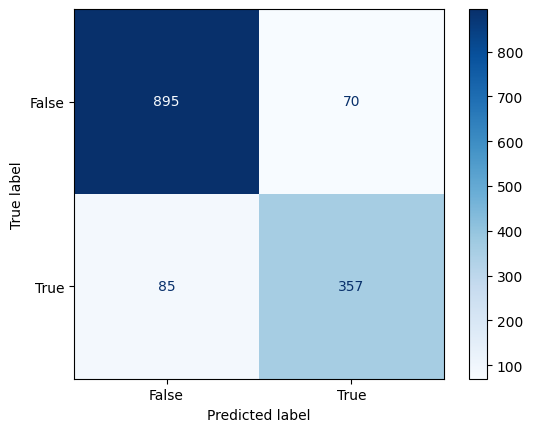

In [42]:
# Faire des prédictions avec le modèle RandomForestClassifier
y_pred_simple = model_simple.predict(X_test)

# Générer la matrice de confusion
cm_simple = confusion_matrix(y_test, y_pred_simple)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm_simple, display_labels=model_simple.classes_)
disp.plot(cmap='Blues', values_format='d')

In [374]:
#   On choisit de garder le model RandomForrestClassifier avec un max_depth de 10 et un n_estimators de 50 & l'ensemble strastifié (cad équilibré entre # les deux valeurs a prédire)
#   car le model est plus performant que les deux autres (model simplifié). L'accuracy est de 0.889, et la precision
#   de client résilié à 84% ce qui est correct

#   Pour ce type d'exercice on utilise predic_proba pour obtenir les probabilités de prédiction que le target soit 1 dans churn donc resilié
#   On defini un seuil sur lequel on estime que le client a une la probabilité de resilier, ici 0.5
#   On remet les ID que l'on sauvegarder dans le train test split pour pouvoir les recuperer facilement

#   On exporte le dataframe

In [43]:
# Exporter la liste des clients à risque 
# on determine le seuil a 0.5 de probabilité de resilier pour faire parti de la liste

clients_a_risque = predictions_df[predictions_df['probability'] > 0.5]
clients_a_risque.to_csv('clients_a_risque.csv', index=False)

In [44]:
#  Autre reflexion :
# Recuperer un dataFrame des clients prédits en résiliés mais qui ne le sont pas, par déduction si le modèle les prédits mal
# c'est que ce sont les clients qui présentent le plus de risques de résilier dans le futur

# Obtenir les index des échantillons dans le DataFrame d'origine
test_indices = y_test.index

# Obtenir le DataFrame d'origine pour les données de test en utilisant les indices
X_test_df = data.loc[test_indices].drop(columns=['customerID', 'Churn'])

# Créer un masque pour les erreurs où la prédiction est 1 et la vraie valeur est 0
mask_errors = (y_pred_simple == 1) & (y_test == 0)

# Filtrer les lignes du DataFrame d'origine où il y a des erreurs
df_errors = X_test_df[mask_errors].copy()

# Ajouter les vraies valeurs et les prédictions au DataFrame pour plus de clarté
df_errors['True_Label'] = y_test[mask_errors].values
df_errors['Predicted_Label'] = y_pred_simple[mask_errors]

df_errors

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,True_Label,Predicted_Label
5866,Male,False,False,False,3,True,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,True,Mailed check,19.65,68.35,False,True
5087,Female,False,True,False,2,True,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,20.35,41.85,False,True
4487,Male,False,True,True,4,True,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),24.10,73.10,False,True
6159,Female,False,False,True,2,True,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,False,Bank transfer (automatic),20.50,38.25,False,True
2927,Male,False,False,False,1,True,No,Fiber optic,No,No,...,No,No,No,Month-to-month,True,Electronic check,69.90,69.90,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,Male,False,False,False,1,True,Yes,Fiber optic,Yes,Yes,...,No,No,No,Month-to-month,False,Electronic check,61.15,61.15,False,True
6361,Female,False,False,False,7,True,No,DSL,No,No,...,Yes,No,Yes,Month-to-month,False,Bank transfer (automatic),62.80,418.30,False,True
4570,Male,False,False,False,7,True,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,True,Mailed check,18.95,130.55,False,True
4939,Male,False,False,False,1,True,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,18.90,18.90,False,True


In [45]:
# On recupere les id des clients en join sur le dataframe d'origne
df_errors_with_id = data.loc[test_indices].loc[mask_errors, ['customerID']].join(df_errors)


In [46]:
df_errors_with_id

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,True_Label,Predicted_Label
5866,7526-IVLYU,Male,False,False,False,3,True,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,True,Mailed check,19.65,68.35,False,True
5087,8739-QOTTN,Female,False,True,False,2,True,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,20.35,41.85,False,True
4487,4116-IQRFR,Male,False,True,True,4,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),24.10,73.10,False,True
6159,5857-XRECV,Female,False,False,True,2,True,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,False,Bank transfer (automatic),20.50,38.25,False,True
2927,5542-TBBWB,Male,False,False,False,1,True,No,Fiber optic,No,...,No,No,No,Month-to-month,True,Electronic check,69.90,69.90,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,1928-BXYIV,Male,False,False,False,1,True,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,False,Electronic check,61.15,61.15,False,True
6361,5309-TAIKL,Female,False,False,False,7,True,No,DSL,No,...,Yes,No,Yes,Month-to-month,False,Bank transfer (automatic),62.80,418.30,False,True
4570,1386-ZIKUV,Male,False,False,False,7,True,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,True,Mailed check,18.95,130.55,False,True
4939,9975-SKRNR,Male,False,False,False,1,True,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,False,Mailed check,18.90,18.90,False,True


In [542]:
df_errors_with_id.to_csv('errors_predicted_as_1_actual_0.csv', index=False)